<a href="https://colab.research.google.com/github/Jeshwanth2/AI-ML-Internship-Task-10/blob/main/KNN%E2%80%93Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
display(df.head())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
print(f"Shape of feature data (digits.data): {digits.data.shape}")
print(f"Shape of target labels (digits.target): {digits.target.shape}")

Shape of feature data (digits.data): (1797, 64)
Shape of target labels (digits.target): (1797,)


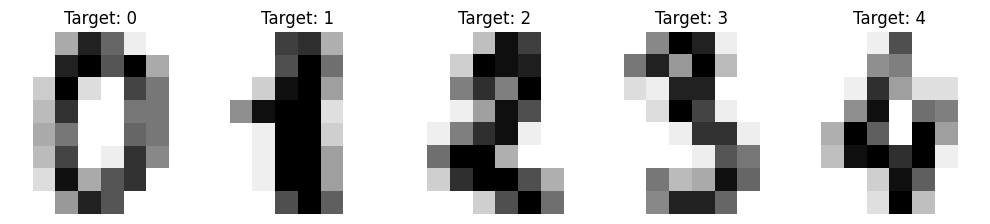

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))

for ax, image, label in zip(axes, digits.data, digits.target):
    ax.set_axis_off()
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Target: {label}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1347, 64)
X_test shape: (450, 64)
y_train shape: (1347,)
y_test shape: (450,)


In [ ]:
from sklearn.preprocessing import StandardScaler
print("StandardScaler imported successfully.")

StandardScaler imported successfully.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train after scaling shape: {X_train.shape}")
print(f"X_test after scaling shape: {X_test.shape}")
print("Features scaled successfully.")

X_train after scaling shape: (1347, 64)
X_test after scaling shape: (450, 64)
Features scaled successfully.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("KNeighborsClassifier imported successfully.")

KNeighborsClassifier imported successfully.


In [ ]:
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train, y_train)
y_pred_k3 = knn_k3.predict(X_test)
print("KNN model with K=3 trained and predictions made.")

KNN model with K=3 trained and predictions made.


In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy_score imported successfully.")

accuracy_score imported successfully.


In [ ]:
accuracy_k3 = accuracy_score(y_test, y_pred_k3)
print(f"Accuracy of KNN model with K=3: {accuracy_k3:.4f}")

Accuracy of KNN model with K=3: 0.9667


In [ ]:
k_values = [3, 5, 7, 9]
accuracies = []
print(f"K values to evaluate: {k_values}")
print("Accuracies list initialized.")

K values to evaluate: [3, 5, 7, 9]
Accuracies list initialized.


In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"KNN with K={k}: Accuracy = {accuracy:.4f}")

KNN with K=3: Accuracy = 0.9667
KNN with K=5: Accuracy = 0.9756
KNN with K=7: Accuracy = 0.9778
KNN with K=9: Accuracy = 0.9756


In [ ]:
print(f"Evaluated K values: {k_values}")
print(f"Corresponding accuracies: {accuracies}")

Evaluated K values: [3, 5, 7, 9]
Corresponding accuracies: [0.9666666666666667, 0.9755555555555555, 0.9777777777777777, 0.9755555555555555]


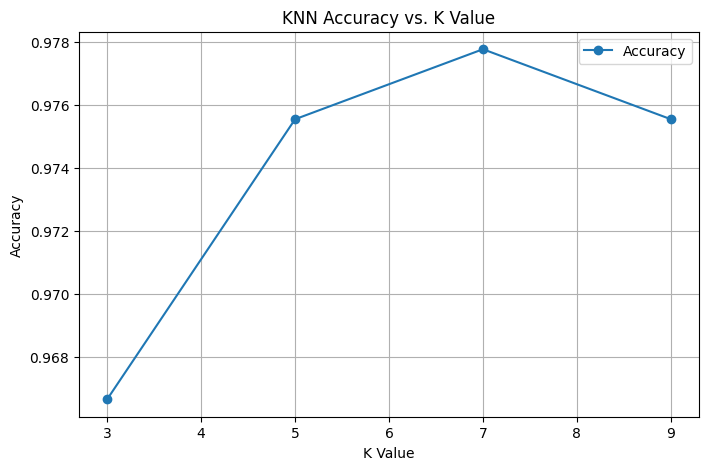

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_k_index = accuracies.index(max(accuracies))
optimal_k = k_values[best_k_index]
print(f"Optimal K value determined from evaluation: {optimal_k}")

Optimal K value determined from evaluation: 7


In [ ]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
print(f"KNN model with optimal K={optimal_k} trained and predictions made.")

KNN model with optimal K=7 trained and predictions made.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("confusion_matrix and seaborn imported successfully.")

confusion_matrix and seaborn imported successfully.


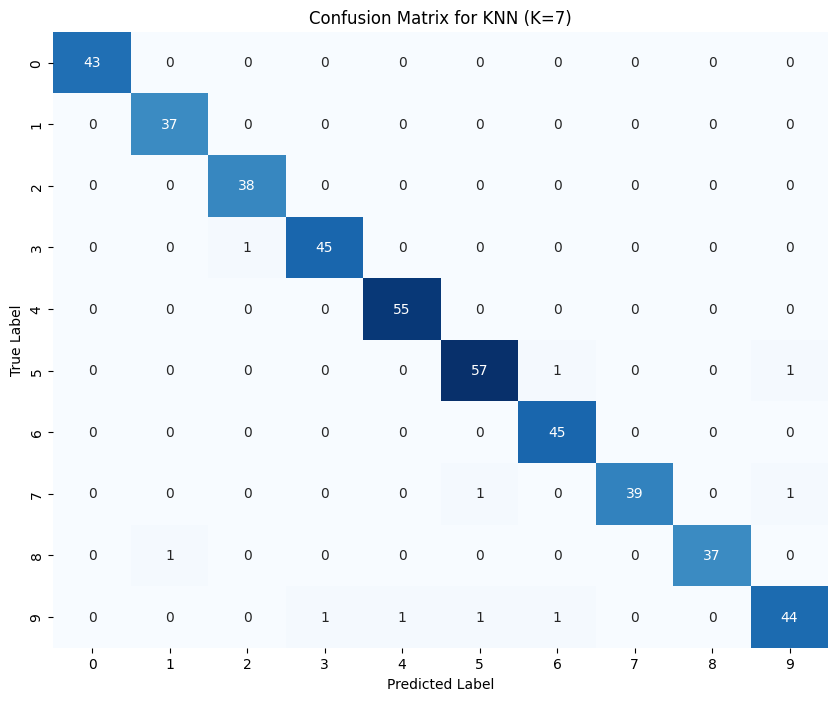

Confusion matrix generated and displayed successfully.


In [ ]:
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for KNN (K={optimal_k})')
plt.show()
print("Confusion matrix generated and displayed successfully.")

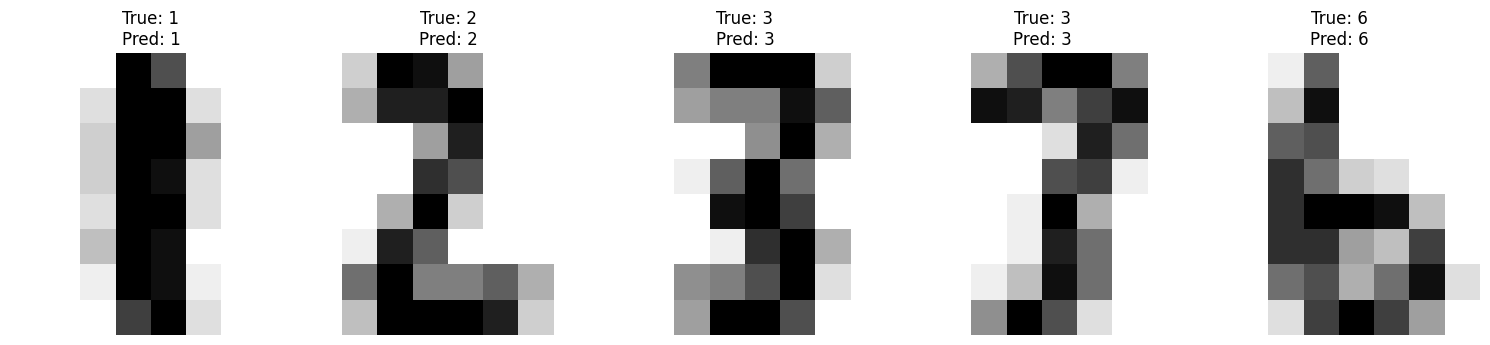

5 sample test images displayed with true and predicted labels.


In [ ]:
_, X_test_unscaled, _, _ = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

# Select 5 random indices from the test set
sample_indices = np.random.choice(len(X_test_unscaled), 5, replace=False)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

for i, ax in enumerate(axes):
    idx = sample_indices[i]
    original_image = X_test_unscaled[idx]
    true_label = y_test[idx]
    predicted_label = y_pred_optimal[idx]

    ax.set_axis_off()
    ax.imshow(original_image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'True: {true_label}\nPred: {predicted_label}')

plt.tight_layout()
plt.show()
print("5 sample test images displayed with true and predicted labels.")